In [42]:
import pandas as pd
# 파일 불러오기
df = pd.read_csv("email.txt", sep=' ', header=None, names=['from', 'to'])

# 결과 확인
print(df.head(40))

    from  to
0      0   1
1      0   2
2      0   3
3      0   4
4      0   5
5      0   6
6      0   7
7      0   8
8      0   9
9      0  10
10     0  11
11     0  12
12     0  13
13     0  14
14     0  15
15     0  16
16     0  17
17     0  18
18     0  19
19     0  20
20     0  21
21     0  22
22     0  23
23     0  24
24     0  25
25     0  26
26     0  27
27     0  28
28     0  29
29     0  30
30     1  17
31     1  31
32     1  12
33     1  15
34     1   9
35     1  23
36     1  32
37     1  33
38     1  21
39     1  34


In [17]:
max(df['to'])

1132

In [18]:
df.tail(20)

,from,to
5431,1042,1097
5432,1044,1111
5433,1052,1128
5434,1065,1104
5435,1066,1069
5436,1066,1068
5437,1066,1104
5438,1066,1077
5439,1068,1104
5440,1068,1069


In [19]:
import pandas as pd
import networkx as nx

# 방향성 네트워크 생성
G = nx.DiGraph()
G.add_edges_from(zip(df['from'], df['to']))

print("노드 수:", G.number_of_nodes())
print("엣지 수:", G.number_of_edges())


노드 수: 1133
엣지 수: 5451


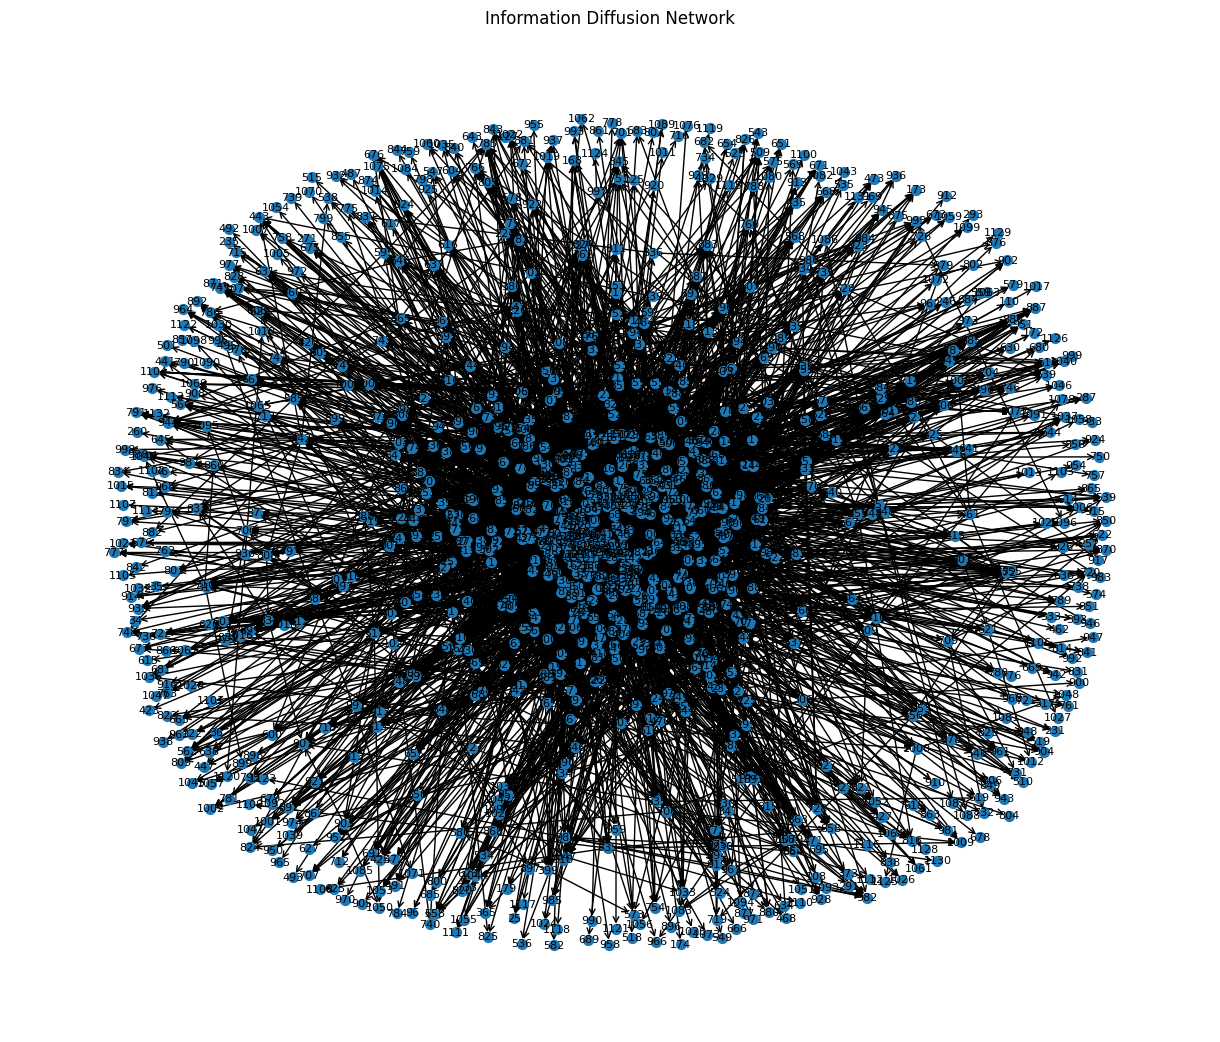

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
nx.draw(G, with_labels=True, node_size=50, font_size=8, arrowstyle='->', arrowsize=10)
plt.title("Information Diffusion Network")
plt.show()


In [10]:
# 중심성 계산
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)

# 상위 5개 노드 출력
print("Degree Centrality Top 5:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Betweenness Centrality Top 5:", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Closeness Centrality Top 5:", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("PageRank Top 5:", sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5])


Degree Centrality Top 5: [(104, 0.0627208480565371), (332, 0.045936395759717315), (15, 0.045053003533568906), (22, 0.045053003533568906), (41, 0.045053003533568906)]
Betweenness Centrality Top 5: [(232, 0.008895413407929502), (377, 0.008803710090262169), (332, 0.008053985528796456), (577, 0.008049158868163223), (428, 0.005847513403765859)]
Closeness Centrality Top 5: [(659, 0.1213257265864796), (774, 0.11634858786836809), (577, 0.11494330103136234), (883, 0.11481648961489138), (676, 0.11121507759386688)]
PageRank Top 5: [(1111, 0.008530581627873646), (785, 0.006458927001783324), (1104, 0.005301310312206199), (887, 0.005045474950698277), (1097, 0.00463772065389747)]


In [13]:
# 무방향 그래프로 변환
undirected_G = G.to_undirected()

# 평균 경로 길이 계산
avg_path_length = nx.average_shortest_path_length(undirected_G)
print("평균 경로 길이 (Undirected):", avg_path_length)



평균 경로 길이 (Undirected): 3.606032017315423


In [14]:
# Outdegree 기준 슈퍼스프레더 찾기
out_degree = G.out_degree()
super_spreader = sorted(out_degree, key=lambda x: x[1], reverse=True)[:5]
print("슈퍼스프레더 Top 5 (Outdegree 기준):", super_spreader)


슈퍼스프레더 Top 5 (Outdegree 기준): [(104, 57), (41, 47), (22, 46), (40, 43), (15, 42)]


In [21]:
from networkx.algorithms import simple_paths

# 특정 노드에서 시작하는 확산 시뮬레이션
start_node = 0
spread_paths = list(nx.all_simple_paths(G, source=start_node, target=1097))  # 예시 타겟 노드
print(f"Node {start_node}에서 타겟까지 가능한 확산 경로 수:", len(spread_paths))


KeyboardInterrupt: 

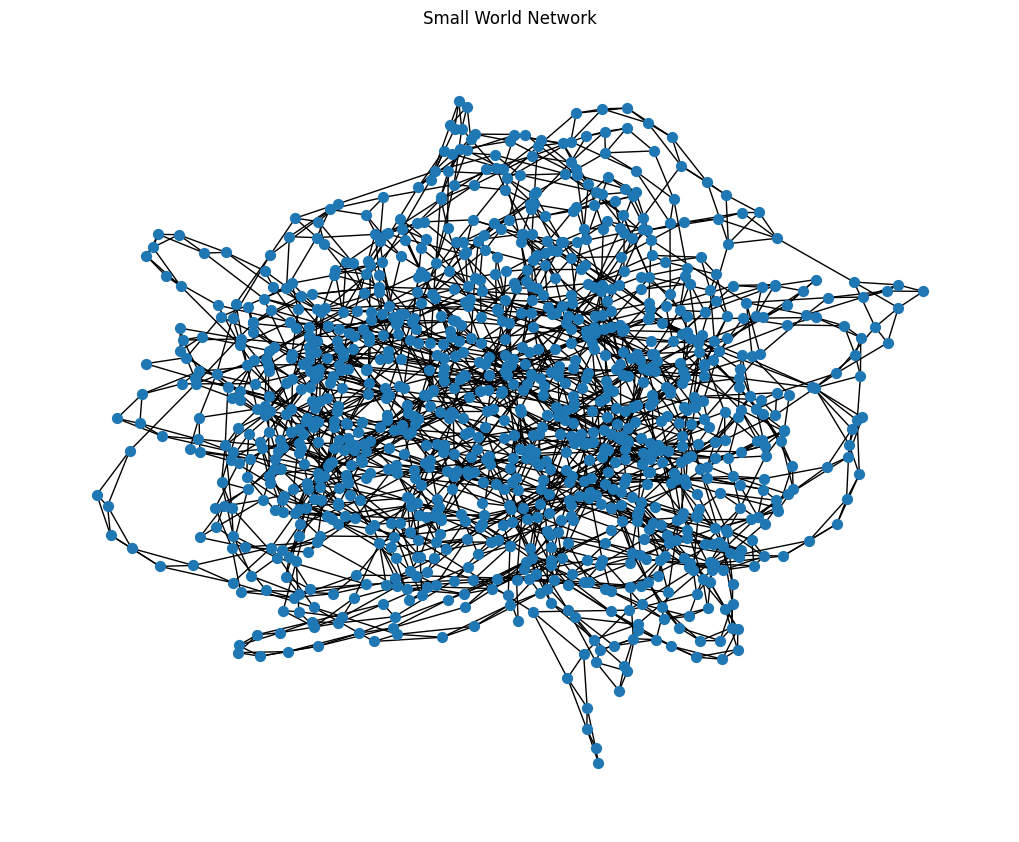

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# 데이터에서 노드 수 계산
num_nodes = len(set(df['from']).union(set(df['to'])))

# Small World Network 생성
k = 4  # 평균 연결 수 (실제 데이터의 평균 차수를 바탕으로 설정)
p = 0.1  # 재연결 확률
small_world_G = nx.watts_strogatz_graph(num_nodes, k, p)

# 네트워크 시각화
plt.figure(figsize=(10, 8))
nx.draw(small_world_G, node_size=50, with_labels=False)
plt.title("Small World Network")
plt.show()


In [26]:
import numpy as np

def threshold_model(G, initial_active, thresholds):
    active_nodes = set(initial_active)
    new_active_nodes = set(initial_active)
    
    while new_active_nodes:
        current_active = set(new_active_nodes)
        new_active_nodes = set()
        
        for node in G.nodes():
            if node in active_nodes:
                continue
            
            neighbors = set(G.neighbors(node))
            active_neighbors = neighbors & active_nodes
            
            # 활성화 조건 확인
            if len(active_neighbors) / len(neighbors) >= thresholds[node]:
                new_active_nodes.add(node)
        
        active_nodes.update(new_active_nodes)
        
    return active_nodes

# 초기 조건 설정
initial_active = np.random.choice(list(small_world_G.nodes()), size=10, replace=False)  # 초기 활성화 노드
thresholds = {node: np.random.uniform(0.1, 0.5) for node in small_world_G.nodes()}  # Threshold 설정

# Threshold 모델 실행
active_nodes = threshold_model(small_world_G, initial_active, thresholds)
print("최종 활성화된 노드 수:", len(active_nodes))


최종 활성화된 노드 수: 1133


In [27]:
actual_active_nodes = set(df['to'])  # 실제 데이터의 활성화된 노드
simulated_active_nodes = active_nodes  # 시뮬레이션 결과

coverage_difference = abs(len(actual_active_nodes) - len(simulated_active_nodes))
print("Coverage 차이:", coverage_difference)


Coverage 차이: 1


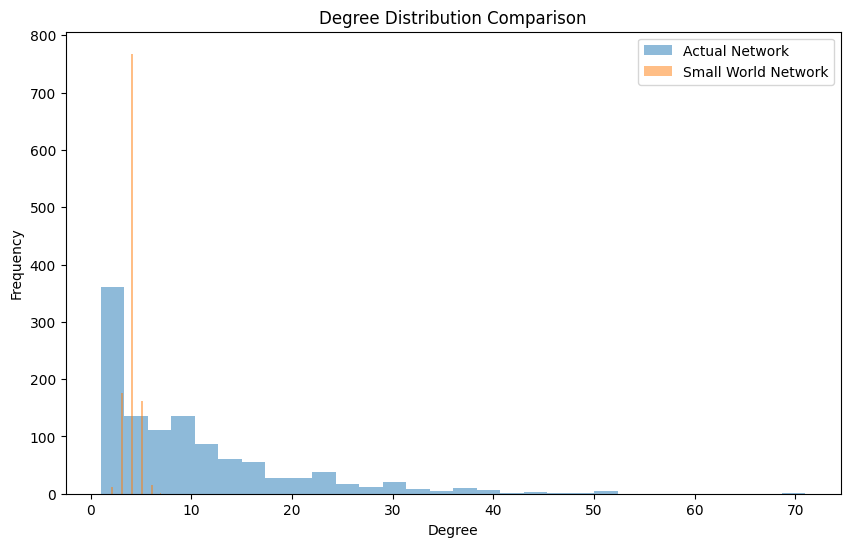

In [31]:
import matplotlib.pyplot as plt

# 실제 데이터의 학위 분포
actual_degree = [degree for _, degree in G.degree()]
simulated_degree = [degree for _, degree in small_world_G.degree()]

plt.figure(figsize=(10, 6))
plt.hist(actual_degree, bins=30, alpha=0.5, label='Actual Network')
plt.hist(simulated_degree, bins=30, alpha=0.5, label='Small World Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution Comparison')
plt.legend()
plt.show()


In [30]:
simulated_edges

{(266, 268),
 (838, 839),
 (1097, 1099),
 (536, 537),
 (1129, 1131),
 (538, 992),
 (584, 959),
 (601, 603),
 (40, 41),
 (299, 301),
 (871, 872),
 (1130, 1132),
 (343, 344),
 (569, 570),
 (602, 604),
 (73, 74),
 (189, 694),
 (872, 873),
 (332, 334),
 (904, 905),
 (635, 637),
 (74, 75),
 (153, 1122),
 (106, 107),
 (905, 906),
 (365, 367),
 (296, 533),
 (937, 938),
 (409, 410),
 (668, 670),
 (107, 108),
 (366, 368),
 (938, 939),
 (398, 400),
 (701, 703),
 (140, 141),
 (399, 401),
 (971, 972),
 (431, 433),
 (443, 444),
 (475, 476),
 (702, 704),
 (135, 965),
 (734, 736),
 (173, 174),
 (432, 434),
 (1004, 1005),
 (476, 477),
 (357, 1014),
 (735, 737),
 (767, 769),
 (206, 207),
 (416, 691),
 (465, 467),
 (1037, 1038),
 (509, 510),
 (768, 770),
 (207, 208),
 (800, 802),
 (239, 240),
 (272, 274),
 (498, 500),
 (1070, 1071),
 (1103, 1105),
 (542, 543),
 (161, 177),
 (801, 803),
 (240, 241),
 (833, 835),
 (305, 307),
 (3, 5),
 (575, 576),
 (834, 836),
 (273, 274),
 (866, 868),
 (338, 340),
 (36, 

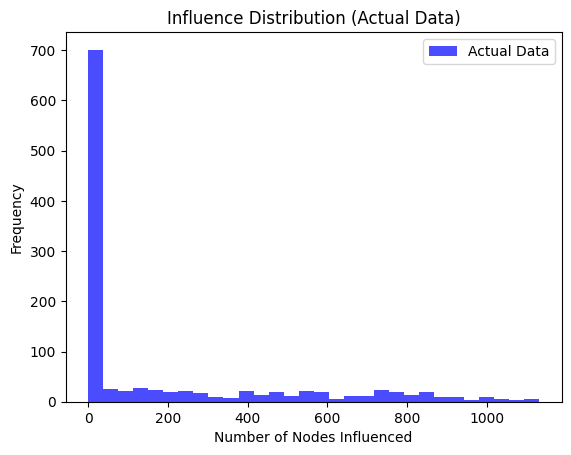

In [32]:
import networkx as nx
import pandas as pd


# 방향성 그래프 생성
G_actual = nx.DiGraph()
G_actual.add_edges_from(zip(df['from'], df['to']))

# 각 노드의 영향력 계산 (도달 가능한 노드 수)
influence_actual = {}
for node in G_actual.nodes():
    reachable_nodes = nx.descendants(G_actual, node)  # 도달 가능한 노드
    influence_actual[node] = len(reachable_nodes)

# 결과를 분포로 시각화
import matplotlib.pyplot as plt

plt.hist(influence_actual.values(), bins=30, alpha=0.7, color='b', label='Actual Data')
plt.xlabel("Number of Nodes Influenced")
plt.ylabel("Frequency")
plt.title("Influence Distribution (Actual Data)")
plt.legend()
plt.show()


In [34]:
def threshold_propagation(G, initial_active, thresholds):
    """
    Small World Network에서 Threshold 모델을 실행하며 방향성을 반영.
    G: 무방향 네트워크
    initial_active: 초기 활성화 노드 리스트
    thresholds: 각 노드의 Threshold 값
    """
    active_nodes = set(initial_active)  # 활성화된 노드
    influence = {node: 0 for node in G.nodes()}  # 각 노드의 최종 영향력

    # 활성화된 노드는 즉시 영향력 +1
    for node in initial_active:
        influence[node] = 1

    new_active_nodes = set(initial_active)
    visited_edges = set()  # 방향성을 확인하기 위해 방문한 엣지 저장

    while new_active_nodes:
        current_active = set(new_active_nodes)
        new_active_nodes = set()

        for node in current_active:
            neighbors = set(G.neighbors(node))

            for neighbor in neighbors:
                edge = (node, neighbor)
                if edge in visited_edges or neighbor in active_nodes:
                    continue

                # Threshold 조건 확인
                active_neighbors = sum(1 for n in G.neighbors(neighbor) if n in active_nodes)
                if active_neighbors / len(list(G.neighbors(neighbor))) >= thresholds[neighbor]:
                    new_active_nodes.add(neighbor)
                    visited_edges.add(edge)
                    influence[neighbor] = influence[node] + 1  # 영향력 증가

        active_nodes.update(new_active_nodes)

    return influence

# 초기 조건
initial_active = np.random.choice(list(small_world_G.nodes()), size=5, replace=False)
thresholds = {node: np.random.uniform(0.1, 0.5) for node in small_world_G.nodes()}

# Threshold 모델 실행
influence_simulated = threshold_propagation(small_world_G, initial_active, thresholds)

# 결과 확인
print("최종 영향력 분포 예시:", list(influence_simulated.items())[:10])


최종 영향력 분포 예시: [(0, 2), (1, 4), (2, 3), (3, 4), (4, 4), (5, 5), (6, 6), (7, 8), (8, 7), (9, 48)]


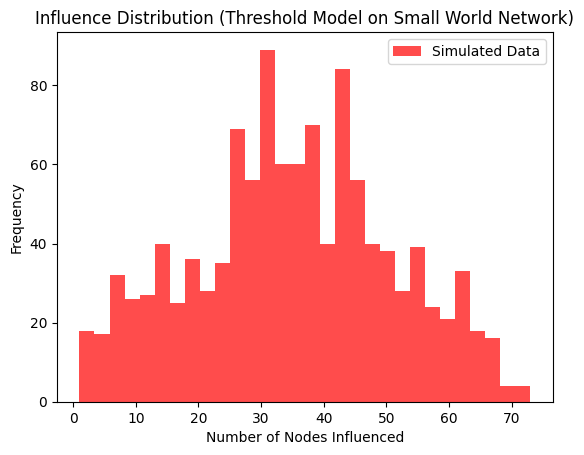

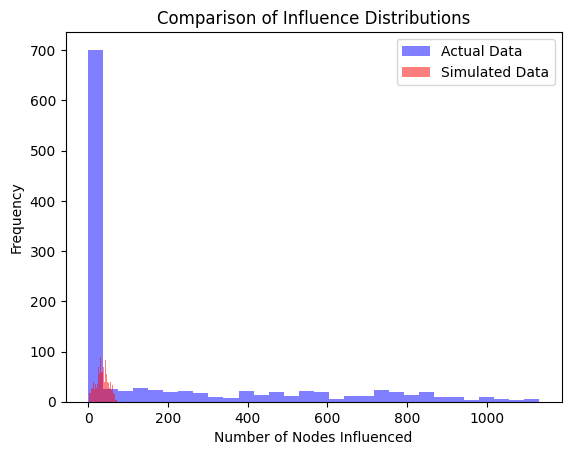

In [35]:
# 시뮬레이션 결과 분포
plt.hist(influence_simulated.values(), bins=30, alpha=0.7, color='r', label='Simulated Data')
plt.xlabel("Number of Nodes Influenced")
plt.ylabel("Frequency")
plt.title("Influence Distribution (Threshold Model on Small World Network)")
plt.legend()
plt.show()

# 실제 데이터와 함께 비교할 경우
actual_influence = {node: len(nx.descendants(G_actual, node)) for node in G_actual.nodes()}  # 실제 데이터에서 영향력
plt.hist(actual_influence.values(), bins=30, alpha=0.5, label='Actual Data', color='b')
plt.hist(influence_simulated.values(), bins=30, alpha=0.5, label='Simulated Data', color='r')
plt.xlabel("Number of Nodes Influenced")
plt.ylabel("Frequency")
plt.title("Comparison of Influence Distributions")
plt.legend()
plt.show()


In [37]:
from scipy.stats import entropy, wasserstein_distance

# 분포 비교를 위한 히스토그램
simulated_values = list(influence_simulated.values())
actual_values = list(actual_influence.values())

# Wasserstein Distance
wasserstein_dist = wasserstein_distance(actual_values, simulated_values)
print("Wasserstein Distance:", wasserstein_dist)


Wasserstein Distance: 177.5357458075905


k=2, p=0.05, mean=0.30, std=0.05, Wasserstein: 178.7965
k=2, p=0.05, mean=0.30, std=0.10, Wasserstein: 183.9898
k=2, p=0.05, mean=0.30, std=0.15, Wasserstein: 185.5633
k=2, p=0.05, mean=0.30, std=0.20, Wasserstein: 185.6330
k=2, p=0.05, mean=0.40, std=0.05, Wasserstein: 185.6302
k=2, p=0.05, mean=0.40, std=0.10, Wasserstein: 185.6161
k=2, p=0.05, mean=0.40, std=0.15, Wasserstein: 185.6568
k=2, p=0.05, mean=0.40, std=0.20, Wasserstein: 185.6602
k=2, p=0.05, mean=0.50, std=0.05, Wasserstein: 185.6630
k=2, p=0.05, mean=0.50, std=0.10, Wasserstein: 185.6627
k=2, p=0.05, mean=0.50, std=0.15, Wasserstein: 185.6627
k=2, p=0.05, mean=0.50, std=0.20, Wasserstein: 185.6588
k=2, p=0.05, mean=0.60, std=0.05, Wasserstein: 185.6644
k=2, p=0.05, mean=0.60, std=0.10, Wasserstein: 185.6644
k=2, p=0.05, mean=0.60, std=0.15, Wasserstein: 185.6634
k=2, p=0.05, mean=0.60, std=0.20, Wasserstein: 185.6637
k=2, p=0.05, mean=0.70, std=0.05, Wasserstein: 185.6646
k=2, p=0.05, mean=0.70, std=0.10, Wasserstein: 1

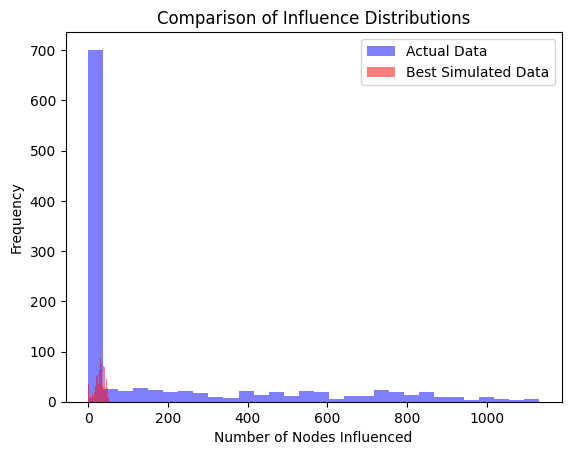

In [44]:
import networkx as nx
import numpy as np
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt

# Threshold 전파 모델
def threshold_propagation(G, initial_active, thresholds):
    active_nodes = set(initial_active)
    visited_edges = set()
    new_active_nodes = set(initial_active)
    influence = {node: 0 for node in G.nodes()}  # 각 노드의 영향력

    while new_active_nodes:
        current_active = set(new_active_nodes)
        new_active_nodes = set()

        for node in current_active:
            neighbors = set(G.neighbors(node))
            for neighbor in neighbors:
                edge = (node, neighbor)
                if edge in visited_edges or neighbor in active_nodes:
                    continue
                active_neighbors = sum(1 for n in G.neighbors(neighbor) if n in active_nodes)
                if active_neighbors / len(list(G.neighbors(neighbor))) >= thresholds[neighbor]:
                    new_active_nodes.add(neighbor)
                    visited_edges.add(edge)
                    influence[neighbor] = influence[node] + 1  # 영향력 증가

        active_nodes.update(new_active_nodes)
    return influence

# Grid Search 수행
def grid_search_extended(actual_values, num_nodes, k_values, p_values, mean_values, std_values, num_iterations=5):
    best_wasserstein = float('inf')
    best_params = None
    best_distribution = None

    for k in k_values:
        for p in p_values:
            for mean in mean_values:
                for std in std_values:
                    wasserstein_list = []

                    for _ in range(num_iterations):  # 평균화를 위해 여러 번 반복
                        # Small World 네트워크 생성
                        small_world_G = nx.watts_strogatz_graph(num_nodes, k, p)

                        # Threshold 설정: 평균과 표준편차에 따라 정규 분포에서 샘플링
                        thresholds = {node: max(0, min(1, np.random.normal(mean, std))) for node in small_world_G.nodes()}
                        initial_active = [0]  # 전파 시작 노드

                        # Threshold 모델 실행
                        influence_simulated = threshold_propagation(small_world_G, initial_active, thresholds)

                        # 영향력 분포
                        simulated_values = list(influence_simulated.values())

                        # Wasserstein Distance 계산
                        wasserstein = wasserstein_distance(actual_values, simulated_values)
                        wasserstein_list.append(wasserstein)

                    avg_wasserstein = np.mean(wasserstein_list)
                    print(f"k={k}, p={p}, mean={mean:.2f}, std={std:.2f}, Wasserstein: {avg_wasserstein:.4f}")

                    # 최적화된 파라미터 갱신
                    if avg_wasserstein < best_wasserstein:
                        best_wasserstein = avg_wasserstein
                        best_params = (k, p, mean, std)
                        best_distribution = simulated_values

    return best_params, best_wasserstein, best_distribution

# 실제 데이터 영향력 계산
# df = pd.read_csv("your_data.csv")  # from-to 데이터
G_actual = nx.DiGraph()
G_actual.add_edges_from(zip(df['from'], df['to']))
actual_influence = {node: len(nx.descendants(G_actual, node)) for node in G_actual.nodes()}
actual_values = list(actual_influence.values())

# Grid Search 설정
num_nodes = len(set(df['from']).union(set(df['to'])))  # 실제 노드 수
k_values = range(2, 10, 8)  # 평균 연결 수 후보
p_values = np.linspace(0.05, 0.5, 10)  # 재연결 확률 후보
mean_values = np.linspace(0, 1, 20)  # Threshold 평균값 후보
std_values = np.linspace(0.05, 0.5, 20)  # Threshold 표준편차 후보

# Grid Search 실행
best_params, best_wasserstein, best_distribution = grid_search_extended(
    actual_values, num_nodes, k_values, p_values, mean_values, std_values
)

# 결과 출력
print(f"최적의 파라미터: k={best_params[0]}, p={best_params[1]}, mean={best_params[2]:.2f}, std={best_params[3]:.2f}")
print(f"최소 Wasserstein Distance: {best_wasserstein:.4f}")

# 최적 결과 시각화
plt.hist(actual_values, bins=30, alpha=0.5, label='Actual Data', color='b')
plt.hist(best_distribution, bins=30, alpha=0.5, label='Best Simulated Data', color='r')
plt.xlabel("Number of Nodes Influenced")
plt.ylabel("Frequency")
plt.title("Comparison of Influence Distributions")
plt.legend()
plt.show()


m=2, mean=0.00, std=0.05, Wasserstein: 184.4515
m=2, mean=0.00, std=0.07, Wasserstein: 184.4101
m=2, mean=0.00, std=0.10, Wasserstein: 184.3744
m=2, mean=0.00, std=0.12, Wasserstein: 184.3340
m=2, mean=0.00, std=0.14, Wasserstein: 184.3290
m=2, mean=0.00, std=0.17, Wasserstein: 184.3066
m=2, mean=0.00, std=0.19, Wasserstein: 184.2394
m=2, mean=0.00, std=0.22, Wasserstein: 184.2381
m=2, mean=0.00, std=0.24, Wasserstein: 184.1516
m=2, mean=0.00, std=0.26, Wasserstein: 184.1730
m=2, mean=0.00, std=0.29, Wasserstein: 184.1666
m=2, mean=0.00, std=0.31, Wasserstein: 184.0921
m=2, mean=0.00, std=0.33, Wasserstein: 184.1301
m=2, mean=0.00, std=0.36, Wasserstein: 184.0468
m=2, mean=0.00, std=0.38, Wasserstein: 183.8930
m=2, mean=0.00, std=0.41, Wasserstein: 183.9936
m=2, mean=0.00, std=0.43, Wasserstein: 183.9527
m=2, mean=0.00, std=0.45, Wasserstein: 183.8076
m=2, mean=0.00, std=0.48, Wasserstein: 183.7539
m=2, mean=0.00, std=0.50, Wasserstein: 183.8798
m=2, mean=0.05, std=0.05, Wasserstein: 1

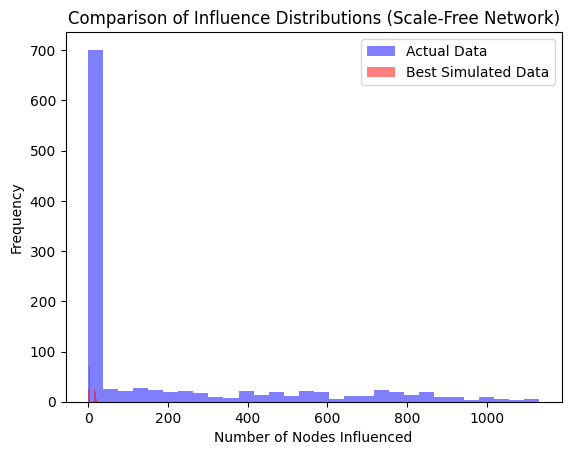

In [46]:
import networkx as nx
import numpy as np
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt

# Threshold 전파 모델
def threshold_propagation(G, initial_active, thresholds):
    active_nodes = set(initial_active)
    visited_edges = set()
    new_active_nodes = set(initial_active)
    influence = {node: 0 for node in G.nodes()}  # 각 노드의 영향력

    while new_active_nodes:
        current_active = set(new_active_nodes)
        new_active_nodes = set()

        for node in current_active:
            neighbors = set(G.neighbors(node))
            for neighbor in neighbors:
                edge = (node, neighbor)
                if edge in visited_edges or neighbor in active_nodes:
                    continue
                active_neighbors = sum(1 for n in G.neighbors(neighbor) if n in active_nodes)
                if active_neighbors / len(list(G.neighbors(neighbor))) >= thresholds[neighbor]:
                    new_active_nodes.add(neighbor)
                    visited_edges.add(edge)
                    influence[neighbor] = influence[node] + 1  # 영향력 증가

        active_nodes.update(new_active_nodes)
    return influence

# Grid Search 수행
def grid_search_scale_free(actual_values, num_nodes, m_values, mean_values, std_values, num_iterations=5):
    best_wasserstein = float('inf')
    best_params = None
    best_distribution = None

    for m in m_values:
        for mean in mean_values:
            for std in std_values:
                wasserstein_list = []

                for _ in range(num_iterations):  # 평균화를 위해 여러 번 반복
                    # Scale-Free Network 생성
                    scale_free_G = nx.barabasi_albert_graph(num_nodes, m)

                    # Threshold 설정: 평균과 표준편차에 따라 정규 분포에서 샘플링
                    thresholds = {node: max(0, min(1, np.random.normal(mean, std))) for node in scale_free_G.nodes()}
                    initial_active = [0]  # 전파 시작 노드

                    # Threshold 모델 실행
                    influence_simulated = threshold_propagation(scale_free_G, initial_active, thresholds)

                    # 영향력 분포
                    simulated_values = list(influence_simulated.values())

                    # Wasserstein Distance 계산
                    wasserstein = wasserstein_distance(actual_values, simulated_values)
                    wasserstein_list.append(wasserstein)

                avg_wasserstein = np.mean(wasserstein_list)
                print(f"m={m}, mean={mean:.2f}, std={std:.2f}, Wasserstein: {avg_wasserstein:.4f}")

                # 최적화된 파라미터 갱신
                if avg_wasserstein < best_wasserstein:
                    best_wasserstein = avg_wasserstein
                    best_params = (m, mean, std)
                    best_distribution = simulated_values

    return best_params, best_wasserstein, best_distribution

# 실제 데이터 영향력 계산
# df = pd.read_csv("your_data.csv")  # from-to 데이터
G_actual = nx.DiGraph()
G_actual.add_edges_from(zip(df['from'], df['to']))
actual_influence = {node: len(nx.descendants(G_actual, node)) for node in G_actual.nodes()}
actual_values = list(actual_influence.values())

# Grid Search 설정
num_nodes = len(set(df['from']).union(set(df['to'])))  # 실제 노드 수
m_values = range(2, 10)  # Scale-Free Network의 m 파라미터 후보 (평균 연결 수)
mean_values = np.linspace(0, 1, 20)  # Threshold 평균값 후보
std_values = np.linspace(0.05, 0.5, 20)  # Threshold 표준편차 후보

# Grid Search 실행
best_params, best_wasserstein, best_distribution = grid_search_scale_free(
    actual_values, num_nodes, m_values, mean_values, std_values
)

# 결과 출력
print(f"최적의 파라미터: m={best_params[0]}, mean={best_params[1]:.2f}, std={best_params[2]:.2f}")
print(f"최소 Wasserstein Distance: {best_wasserstein:.4f}")

# 최적 결과 시각화
plt.hist(actual_values, bins=30, alpha=0.5, label='Actual Data', color='b')
plt.hist(best_distribution, bins=30, alpha=0.5, label='Best Simulated Data', color='r')
plt.xlabel("Number of Nodes Influenced")
plt.ylabel("Frequency")
plt.title("Comparison of Influence Distributions (Scale-Free Network)")
plt.legend()
plt.show()


Grid Search Progress:   2%|▏         | 7/375 [00:01<00:59,  6.16it/s]

k=4, p=0.05, alpha=3.00, Wasserstein: 181.8177


Grid Search Progress:   3%|▎         | 12/375 [00:01<00:52,  6.86it/s]

k=4, p=0.05, alpha=3.50, Wasserstein: 182.6004


Grid Search Progress:   4%|▍         | 16/375 [00:02<00:47,  7.59it/s]

k=4, p=0.05, alpha=4.00, Wasserstein: 183.0000


Grid Search Progress:   6%|▌         | 22/375 [00:03<00:43,  8.10it/s]

k=4, p=0.05, alpha=4.50, Wasserstein: 183.2155


Grid Search Progress:   7%|▋         | 26/375 [00:03<00:55,  6.30it/s]

k=4, p=0.05, alpha=5.00, Wasserstein: 183.3834


Grid Search Progress:   9%|▊         | 32/375 [00:05<01:06,  5.16it/s]

k=4, p=0.1625, alpha=3.00, Wasserstein: 179.8025


Grid Search Progress:  10%|▉         | 37/375 [00:05<00:55,  6.06it/s]

k=4, p=0.1625, alpha=3.50, Wasserstein: 181.8159


Grid Search Progress:  11%|█         | 42/375 [00:06<00:49,  6.79it/s]

k=4, p=0.1625, alpha=4.00, Wasserstein: 182.4800


Grid Search Progress:  13%|█▎        | 47/375 [00:07<00:45,  7.15it/s]

k=4, p=0.1625, alpha=4.50, Wasserstein: 182.8540


Grid Search Progress:  14%|█▎        | 51/375 [00:08<01:15,  4.29it/s]

k=4, p=0.1625, alpha=5.00, Wasserstein: 182.9762


Grid Search Progress:  15%|█▍        | 56/375 [00:09<01:24,  3.77it/s]

k=4, p=0.275, alpha=3.00, Wasserstein: 177.0567


Grid Search Progress:  17%|█▋        | 62/375 [00:10<01:01,  5.10it/s]

k=4, p=0.275, alpha=3.50, Wasserstein: 180.9068


Grid Search Progress:  18%|█▊        | 66/375 [00:11<00:53,  5.80it/s]

k=4, p=0.275, alpha=4.00, Wasserstein: 181.7933


Grid Search Progress:  19%|█▉        | 72/375 [00:12<00:46,  6.47it/s]

k=4, p=0.275, alpha=4.50, Wasserstein: 182.2560


Grid Search Progress:  20%|██        | 76/375 [00:13<01:06,  4.52it/s]

k=4, p=0.275, alpha=5.00, Wasserstein: 182.6932


Grid Search Progress:  22%|██▏       | 81/375 [00:14<01:24,  3.47it/s]

k=4, p=0.3875, alpha=3.00, Wasserstein: 174.9467


Grid Search Progress:  23%|██▎       | 87/375 [00:16<01:01,  4.70it/s]

k=4, p=0.3875, alpha=3.50, Wasserstein: 180.2049


Grid Search Progress:  24%|██▍       | 91/375 [00:16<00:52,  5.40it/s]

k=4, p=0.3875, alpha=4.00, Wasserstein: 181.3801


Grid Search Progress:  26%|██▌       | 97/375 [00:17<00:44,  6.25it/s]

k=4, p=0.3875, alpha=4.50, Wasserstein: 182.0807


Grid Search Progress:  27%|██▋       | 100/375 [00:18<00:42,  6.40it/s]

k=4, p=0.3875, alpha=5.00, Wasserstein: 182.4157


Grid Search Progress:  28%|██▊       | 105/375 [00:20<01:36,  2.80it/s]

k=4, p=0.5, alpha=3.00, Wasserstein: 173.6251


Grid Search Progress:  30%|██▉       | 112/375 [00:21<00:58,  4.47it/s]

k=4, p=0.5, alpha=3.50, Wasserstein: 179.3124


Grid Search Progress:  31%|███       | 117/375 [00:22<00:49,  5.26it/s]

k=4, p=0.5, alpha=4.00, Wasserstein: 181.0399


Grid Search Progress:  32%|███▏      | 121/375 [00:23<00:58,  4.32it/s]

k=4, p=0.5, alpha=4.50, Wasserstein: 181.7516


Grid Search Progress:  34%|███▎      | 126/375 [00:24<00:55,  4.46it/s]

k=4, p=0.5, alpha=5.00, Wasserstein: 182.1802


Grid Search Progress:  35%|███▍      | 131/375 [00:26<01:09,  3.53it/s]

k=8, p=0.05, alpha=3.00, Wasserstein: 177.2242


Grid Search Progress:  37%|███▋      | 137/375 [00:27<00:52,  4.58it/s]

k=8, p=0.05, alpha=3.50, Wasserstein: 180.2162


Grid Search Progress:  38%|███▊      | 141/375 [00:28<00:45,  5.18it/s]

k=8, p=0.05, alpha=4.00, Wasserstein: 181.4399


Grid Search Progress:  39%|███▉      | 146/375 [00:29<00:42,  5.34it/s]

k=8, p=0.05, alpha=4.50, Wasserstein: 182.0175


Grid Search Progress:  40%|████      | 151/375 [00:30<01:27,  2.55it/s]

k=8, p=0.05, alpha=5.00, Wasserstein: 182.2623


Grid Search Progress:  42%|████▏     | 156/375 [00:34<02:11,  1.66it/s]

k=8, p=0.1625, alpha=3.00, Wasserstein: 160.4870


Grid Search Progress:  43%|████▎     | 161/375 [00:36<01:19,  2.68it/s]

k=8, p=0.1625, alpha=3.50, Wasserstein: 176.1433


Grid Search Progress:  44%|████▍     | 166/375 [00:37<00:57,  3.61it/s]

k=8, p=0.1625, alpha=4.00, Wasserstein: 179.1741


Grid Search Progress:  46%|████▌     | 171/375 [00:38<00:45,  4.45it/s]

k=8, p=0.1625, alpha=4.50, Wasserstein: 180.3403


Grid Search Progress:  47%|████▋     | 176/375 [00:41<02:13,  1.49it/s]

k=8, p=0.1625, alpha=5.00, Wasserstein: 180.9682


Grid Search Progress:  48%|████▊     | 180/375 [00:48<05:09,  1.59s/it]

k=8, p=0.275, alpha=3.00, Wasserstein: 127.3553


Grid Search Progress:  49%|████▉     | 185/375 [00:51<02:24,  1.31it/s]

k=8, p=0.275, alpha=3.50, Wasserstein: 168.4816


Grid Search Progress:  51%|█████     | 191/375 [00:53<01:18,  2.33it/s]

k=8, p=0.275, alpha=4.00, Wasserstein: 176.3276


Grid Search Progress:  52%|█████▏    | 196/375 [00:55<00:54,  3.27it/s]

k=8, p=0.275, alpha=4.50, Wasserstein: 178.7167


Grid Search Progress:  54%|█████▎    | 201/375 [00:58<02:57,  1.02s/it]

k=8, p=0.275, alpha=5.00, Wasserstein: 179.7836


Grid Search Progress:  55%|█████▍    | 205/375 [01:09<06:37,  2.34s/it]

k=8, p=0.3875, alpha=3.00, Wasserstein: 94.1105


Grid Search Progress:  56%|█████▋    | 211/375 [01:14<02:23,  1.15it/s]

k=8, p=0.3875, alpha=3.50, Wasserstein: 160.7492


Grid Search Progress:  58%|█████▊    | 216/375 [01:16<01:17,  2.05it/s]

k=8, p=0.3875, alpha=4.00, Wasserstein: 173.4265


Grid Search Progress:  59%|█████▉    | 221/375 [01:18<00:52,  2.95it/s]

k=8, p=0.3875, alpha=4.50, Wasserstein: 177.2408


Grid Search Progress:  60%|██████    | 226/375 [01:22<03:10,  1.28s/it]

k=8, p=0.3875, alpha=5.00, Wasserstein: 178.8994


Grid Search Progress:  62%|██████▏   | 231/375 [01:38<05:44,  2.39s/it]

k=8, p=0.5, alpha=3.00, Wasserstein: 85.2598


Grid Search Progress:  63%|██████▎   | 235/375 [01:42<03:13,  1.38s/it]

k=8, p=0.5, alpha=3.50, Wasserstein: 153.2021


Grid Search Progress:  64%|██████▍   | 241/375 [01:45<01:19,  1.69it/s]

k=8, p=0.5, alpha=4.00, Wasserstein: 170.3432


Grid Search Progress:  66%|██████▌   | 246/375 [01:47<00:49,  2.63it/s]

k=8, p=0.5, alpha=4.50, Wasserstein: 176.2265


Grid Search Progress:  67%|██████▋   | 250/375 [01:48<00:41,  3.03it/s]

k=8, p=0.5, alpha=5.00, Wasserstein: 177.9866


Grid Search Progress:  68%|██████▊   | 256/375 [01:51<01:00,  1.97it/s]

k=12, p=0.05, alpha=3.00, Wasserstein: 169.2884


Grid Search Progress:  70%|██████▉   | 261/375 [01:53<00:43,  2.62it/s]

k=12, p=0.05, alpha=3.50, Wasserstein: 177.2881


Grid Search Progress:  71%|███████   | 266/375 [01:55<00:31,  3.46it/s]

k=12, p=0.05, alpha=4.00, Wasserstein: 179.7077


Grid Search Progress:  72%|███████▏  | 271/375 [01:56<00:25,  4.15it/s]

k=12, p=0.05, alpha=4.50, Wasserstein: 180.5795


Grid Search Progress:  73%|███████▎  | 275/375 [01:57<00:23,  4.27it/s]

k=12, p=0.05, alpha=5.00, Wasserstein: 181.1820


Grid Search Progress:  75%|███████▍  | 281/375 [02:08<02:19,  1.49s/it]

k=12, p=0.1625, alpha=3.00, Wasserstein: 118.2094


Grid Search Progress:  76%|███████▋  | 286/375 [02:11<01:06,  1.34it/s]

k=12, p=0.1625, alpha=3.50, Wasserstein: 166.4125


Grid Search Progress:  78%|███████▊  | 291/375 [02:14<00:39,  2.10it/s]

k=12, p=0.1625, alpha=4.00, Wasserstein: 174.8164


Grid Search Progress:  79%|███████▉  | 296/375 [02:15<00:28,  2.82it/s]

k=12, p=0.1625, alpha=4.50, Wasserstein: 177.6448


Grid Search Progress:  80%|████████  | 300/375 [02:16<00:23,  3.14it/s]

k=12, p=0.1625, alpha=5.00, Wasserstein: 178.9479


Grid Search Progress:  82%|████████▏ | 306/375 [02:40<03:23,  2.96s/it]

k=12, p=0.275, alpha=3.00, Wasserstein: 93.5649


Grid Search Progress:  83%|████████▎ | 311/375 [02:45<01:23,  1.31s/it]

k=12, p=0.275, alpha=3.50, Wasserstein: 149.3347


Grid Search Progress:  84%|████████▍ | 316/375 [02:48<00:40,  1.47it/s]

k=12, p=0.275, alpha=4.00, Wasserstein: 168.8000


Grid Search Progress:  85%|████████▌ | 320/375 [02:50<00:27,  2.00it/s]

k=12, p=0.275, alpha=4.50, Wasserstein: 174.8805


Grid Search Progress:  87%|████████▋ | 325/375 [02:52<00:23,  2.14it/s]

k=12, p=0.275, alpha=5.00, Wasserstein: 176.9449


Grid Search Progress:  88%|████████▊ | 330/375 [03:18<03:18,  4.40s/it]

k=12, p=0.3875, alpha=3.00, Wasserstein: 115.6526


Grid Search Progress:  89%|████████▉ | 335/375 [03:26<01:26,  2.17s/it]

k=12, p=0.3875, alpha=3.50, Wasserstein: 131.9116


Grid Search Progress:  91%|█████████ | 341/375 [03:31<00:31,  1.09it/s]

k=12, p=0.3875, alpha=4.00, Wasserstein: 161.9204


Grid Search Progress:  92%|█████████▏| 345/375 [03:34<00:19,  1.57it/s]

k=12, p=0.3875, alpha=4.50, Wasserstein: 171.4780


Grid Search Progress:  93%|█████████▎| 350/375 [03:36<00:11,  2.10it/s]

k=12, p=0.3875, alpha=5.00, Wasserstein: 175.0372


Grid Search Progress:  95%|█████████▍| 356/375 [04:11<01:26,  4.55s/it]

k=12, p=0.5, alpha=3.00, Wasserstein: 144.4012


Grid Search Progress:  96%|█████████▋| 361/375 [04:21<00:31,  2.25s/it]

k=12, p=0.5, alpha=3.50, Wasserstein: 118.6205


Grid Search Progress:  98%|█████████▊| 366/375 [04:26<00:10,  1.13s/it]

k=12, p=0.5, alpha=4.00, Wasserstein: 156.7114


Grid Search Progress:  99%|█████████▉| 371/375 [04:29<00:02,  1.49it/s]

k=12, p=0.5, alpha=4.50, Wasserstein: 169.6514


Grid Search Progress: 100%|██████████| 375/375 [04:31<00:00,  1.38it/s]


k=12, p=0.5, alpha=5.00, Wasserstein: 173.5949

최적의 파라미터: k=8, p=0.5, alpha=3.00
최소 Wasserstein Distance: 85.2598


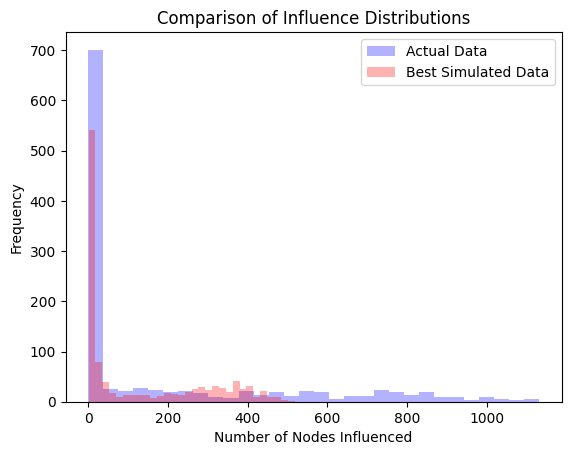

In [59]:
import networkx as nx
import numpy as np
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm  # tqdm 라이브러리 추가

# Zipf 분포 기반 전파 모델
def threshold_propagation(G, initial_active, alpha=2.0):
    active_nodes = set(initial_active)
    visited_edges = set()
    new_active_nodes = set(initial_active)

    while new_active_nodes:
        current_active = set(new_active_nodes)
        new_active_nodes = set()

        for node in current_active:
            neighbors = list(G.neighbors(node))
            if not neighbors:
                continue

            # Zipf 분포에서 샘플링
            zipf_sample = np.random.zipf(alpha)
            num_to_spread = min(zipf_sample, len(neighbors))  # 이웃 수를 초과하지 않도록 제한
            spread_nodes = np.random.choice(neighbors, size=num_to_spread, replace=False)

            for neighbor in spread_nodes:
                edge = (node, neighbor)
                if edge not in visited_edges and neighbor not in active_nodes:
                    new_active_nodes.add(neighbor)
                    visited_edges.add(edge)

        active_nodes.update(new_active_nodes)

    return len(active_nodes) - 1  # 시작 노드 제외

# Grid Search 함수
def grid_search_extended(actual_values, num_nodes, k_values, p_values, alpha_values, num_iterations=5):
    best_wasserstein = float('inf')
    best_params = None
    best_distribution = None

    total_iterations = len(k_values) * len(p_values) * len(alpha_values) * num_iterations
    with tqdm(total=total_iterations, desc="Grid Search Progress") as pbar:
        for k in k_values:
            for p in p_values:
                for alpha in alpha_values:
                    wasserstein_list = []
                    for _ in range(num_iterations):
                        # Small World 네트워크 생성
                        small_world_G = nx.watts_strogatz_graph(num_nodes, k, p)

                        # 시뮬레이션
                        spread_counts = []
                        for node in small_world_G.nodes():
                            spread_counts.append(threshold_propagation(small_world_G, [node], alpha=alpha))

                        # Wasserstein Distance 계산
                        w_dist = wasserstein_distance(actual_values, spread_counts)
                        wasserstein_list.append(w_dist)

                        pbar.update(1)  # tqdm 업데이트

                    avg_wasserstein = np.mean(wasserstein_list)
                    print(f"k={k}, p={p}, alpha={alpha:.2f}, Wasserstein: {avg_wasserstein:.4f}")

                    # 최적 파라미터 갱신
                    if avg_wasserstein < best_wasserstein:
                        best_wasserstein = avg_wasserstein
                        best_params = (k, p, alpha)
                        best_distribution = spread_counts

    return best_params, best_wasserstein, best_distribution

# # 예시 데이터프레임 생성
# data = {'from': [0, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8],
#         'to':   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
# df = pd.DataFrame(data)

# 실제 데이터 계산
G_actual = nx.DiGraph()
G_actual.add_edges_from(zip(df['from'], df['to']))
actual_values = [len(nx.descendants(G_actual, node)) for node in G_actual.nodes()]

# Grid Search 설정
num_nodes = len(set(df['from']).union(set(df['to'])))
k_values = range(4, 16, 4)
p_values = np.linspace(0.05, 0.5, 5)
alpha_values = np.linspace(3, 5, 5)

# Grid Search 실행
best_params, best_wasserstein, best_distribution = grid_search_extended(
    actual_values, num_nodes, k_values, p_values, alpha_values, num_iterations=5
)

# 결과 출력
print(f"\n최적의 파라미터: k={best_params[0]}, p={best_params[1]}, alpha={best_params[2]:.2f}")
print(f"최소 Wasserstein Distance: {best_wasserstein:.4f}")

# 결과 시각화
plt.hist(actual_values, bins=30, alpha=0.3, label='Actual Data', color='b')
plt.hist(best_distribution, bins=30, alpha=0.3, label='Best Simulated Data', color='r')
plt.xlabel("Number of Nodes Influenced")
plt.ylabel("Frequency")
plt.title("Comparison of Influence Distributions")
plt.legend()
plt.show()


Grid Search Progress:  12%|█▏        | 6/50 [00:02<00:14,  3.02it/s]

m=2, alpha=3.00, Wasserstein: 174.6655


Grid Search Progress:  22%|██▏       | 11/50 [00:03<00:09,  4.25it/s]

m=2, alpha=3.50, Wasserstein: 179.5269


Grid Search Progress:  34%|███▍      | 17/50 [00:04<00:06,  5.38it/s]

m=2, alpha=4.00, Wasserstein: 181.2097


Grid Search Progress:  44%|████▍     | 22/50 [00:05<00:04,  6.11it/s]

m=2, alpha=4.50, Wasserstein: 181.9151


Grid Search Progress:  50%|█████     | 25/50 [00:05<00:04,  5.16it/s]

m=2, alpha=5.00, Wasserstein: 182.2821


Grid Search Progress:  60%|██████    | 30/50 [00:27<01:13,  3.68s/it]

m=7, alpha=3.00, Wasserstein: 142.7343


Grid Search Progress:  72%|███████▏  | 36/50 [00:38<00:26,  1.89s/it]

m=7, alpha=3.50, Wasserstein: 138.8891


Grid Search Progress:  82%|████████▏ | 41/50 [00:43<00:10,  1.12s/it]

m=7, alpha=4.00, Wasserstein: 160.4381


Grid Search Progress:  90%|█████████ | 45/50 [00:46<00:04,  1.21it/s]

m=7, alpha=4.50, Wasserstein: 168.8706


Grid Search Progress: 100%|██████████| 50/50 [00:49<00:00,  1.01it/s]


m=7, alpha=5.00, Wasserstein: 173.0081

최적의 파라미터: m=7, alpha=3.50
최소 Wasserstein Distance: 138.8891


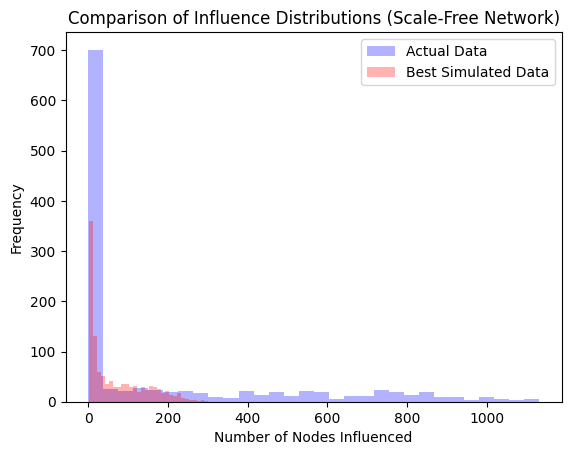

In [61]:
import networkx as nx
import numpy as np
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# Zipf 분포 기반 전파 모델
def threshold_propagation(G, initial_active, alpha=2.0):
    active_nodes = set(initial_active)
    visited_edges = set()
    new_active_nodes = set(initial_active)

    while new_active_nodes:
        current_active = set(new_active_nodes)
        new_active_nodes = set()

        for node in current_active:
            neighbors = list(G.neighbors(node))
            if not neighbors:
                continue

            # Zipf 분포에서 샘플링
            zipf_sample = np.random.zipf(alpha)
            num_to_spread = min(zipf_sample, len(neighbors))  # 이웃 수를 초과하지 않도록 제한
            spread_nodes = np.random.choice(neighbors, size=num_to_spread, replace=False)

            for neighbor in spread_nodes:
                edge = (node, neighbor)
                if edge not in visited_edges and neighbor not in active_nodes:
                    new_active_nodes.add(neighbor)
                    visited_edges.add(edge)

        active_nodes.update(new_active_nodes)

    return len(active_nodes) - 1  # 시작 노드 제외

# Grid Search 함수 (Scale-Free Network 기반)
def grid_search_extended_scale_free(actual_values, num_nodes, m_values, alpha_values, num_iterations=5):
    best_wasserstein = float('inf')
    best_params = None
    best_distribution = None

    total_iterations = len(m_values) * len(alpha_values) * num_iterations
    with tqdm(total=total_iterations, desc="Grid Search Progress") as pbar:
        for m in m_values:  # BA 모델의 새로운 엣지 수
            for alpha in alpha_values:
                wasserstein_list = []
                for _ in range(num_iterations):
                    # Scale-Free 네트워크 생성 (Barabási-Albert 모델)
                    scale_free_G = nx.barabasi_albert_graph(num_nodes, m)

                    # 시뮬레이션
                    spread_counts = []
                    for node in scale_free_G.nodes():
                        spread_counts.append(threshold_propagation(scale_free_G, [node], alpha=alpha))

                    # Wasserstein Distance 계산
                    w_dist = wasserstein_distance(actual_values, spread_counts)
                    wasserstein_list.append(w_dist)

                    pbar.update(1)  # tqdm 업데이트

                avg_wasserstein = np.mean(wasserstein_list)
                print(f"m={m}, alpha={alpha:.2f}, Wasserstein: {avg_wasserstein:.4f}")

                # 최적 파라미터 갱신
                if avg_wasserstein < best_wasserstein:
                    best_wasserstein = avg_wasserstein
                    best_params = (m, alpha)
                    best_distribution = spread_counts

    return best_params, best_wasserstein, best_distribution

# # 예시 데이터프레임 생성
# data = {'from': [0, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8],
#         'to':   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
# df = pd.DataFrame(data)

# 실제 데이터 계산
G_actual = nx.DiGraph()
G_actual.add_edges_from(zip(df['from'], df['to']))
actual_values = [len(nx.descendants(G_actual, node)) for node in G_actual.nodes()]

# Grid Search 설정
num_nodes = len(set(df['from']).union(set(df['to'])))
m_values = range(2, 11, 5)  # BA 모델에서 각 노드가 연결할 새로운 엣지 수
alpha_values = np.linspace(3, 5, 5)

# Grid Search 실행
best_params, best_wasserstein, best_distribution = grid_search_extended_scale_free(
    actual_values, num_nodes, m_values, alpha_values, num_iterations=5
)

# 결과 출력
print(f"\n최적의 파라미터: m={best_params[0]}, alpha={best_params[1]:.2f}")
print(f"최소 Wasserstein Distance: {best_wasserstein:.4f}")

# 결과 시각화
plt.hist(actual_values, bins=30, alpha=0.3, label='Actual Data', color='b')
plt.hist(best_distribution, bins=30, alpha=0.3, label='Best Simulated Data', color='r')
plt.xlabel("Number of Nodes Influenced")
plt.ylabel("Frequency")
plt.title("Comparison of Influence Distributions (Scale-Free Network)")
plt.legend()
plt.show()
